[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/laiadc/MachineLearningHandsOn/blob/main/day4/Deep%20learning%20for%20image%20recognition.ipynb)

# How to learn Deep Learning models?

We have seen that deep learning models consist of a set of layers of neurons with connections between the nodes of each layer. Each layer *learns* a particular feature or trait of the input and uses it to predict the output. 


![](https://drive.google.com/uc?export=view&id=1X3iQfNGN10ZPUak_M4BrjRZKzS8mg0DU)

+ What do we want the neural network to learn? Given the image input (e.g the hand-written number five), we want to learn to **predict the label** (e.g 5). 

+ What do we have to learn to train the neural network? The **connection weights** $w_{11}, w_{12}, \cdots w_{NK}$.

## Elements for training

Even though the algoritm to train the network is quite complex, there are python libraries which make it easy for us to train a neural network. There are just a few things we have to specify, and the library will do the rest:

+ The number of hidden layers.

+ The number of neurons for each layer

+ The type of layer: There are several modifications of the standard neural network described above. These modifications are often used for specific purposes:
  + Fully-connected layer: It is the classical layer, used for general applications.
  + Convolutional layer: Mostly used when the input of the network is an image.
  + Recurrent layer: Used for time series prediction.
  + ...

+ The number of epochs: This is the number of iterations used to train the network. The higher the number of epochs, the longer the training time. 

+  The **loss function**: The loss function is the function the neural network will try to optimize. It should represent the error that the network commits at predicting. For example, if we are performing classification, we will want the loss function to be zero when the prediction is correct, and higher than zero when the prediction is incorrect. That is

$$
\mathcal{L}(y, \hat{y}) =  \left\{
\begin{array}{ll}
      0 & \text{if } y=\hat{y}\\
      1 & \text{if } y\neq\hat{y}
\end{array} 
\right. 
$$

However, this loss function is not a continuous function and therefore it is not suitable for the learning algoritm (it computes the derivatives of the loss function). For this reason, for classification tasks we use a loss function called **cross-entropy**:

$$
\mathcal{L} = - \sum_i t_i \log(s_i) 
$$

where

$$
t_i = \left\{
\begin{array}{ll}
      0 & \text{if } y=\hat{y}\\
      1 & \text{if } y\neq\hat{y}
\end{array} 
\right. 
$$

and $s_i$ is the probablity predicted by the model of $\hat{y}$ being $y$. 

+ There are other parameters which are used in the training algorithm. To enumerate some of them: the learning rate, the batch size, the optimizer, activation function... you can look for information about all these parameters. In this example we will use the standard parameters, which are given by default. 


The training algorithm will do as follows:

+ Initialize the model parameters (weights) to some values.
+ Read the training data (for each example).
+ Predict the output with the current parameters.
+ Compute the loss.
+ Adjuts the model parameters.

# Neural Networks for image recognition

Let's classify handwritten digits:

![alt text](https://github.com/DataScienceUB/DeepLearningMaster20192020/blob/master/images/mnistExamples.png?raw=1)

The next cell imports the digits dataset and show some examples.

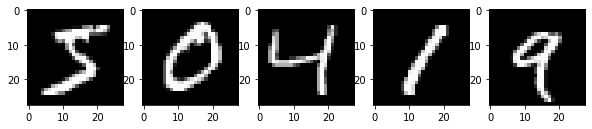

Labels:  5           0             4            1             9


In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

fig, ax = plt.subplots(1,5,figsize=(10, 10))
for i in range(5):
  ax[i].imshow(X_train[i].reshape((28, 28)), interpolation='nearest', cmap='gray')
plt.show()

print("Labels: {:2}  {:10} {:13} {:12}  {:12}".format(y_train[0],y_train[1],y_train[2],y_train[3],y_train[4]))

In [2]:
print('Size of the training set: ', X_train.shape[0])
print('Size of the test set: ', X_test.shape[0])

Size of the training set:  60000
Size of the test set:  10000


As we can see, we need a lot of data to train these kind of models. 

Now we will how to define and train a neural network using a library called Keras.  We will begin using a standard **fully-connected network**.

First of all, let us define the training parameters.

In [3]:
# Parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 64

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input    = 784 # MNIST data input (img shape: 28*28)
n_classes  = 10  # MNIST total classes (0-9 digits)


In [4]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

# Adds a fully-connected layer with 256 units to the model:
model.add(layers.Dense(n_hidden_1, activation='relu', input_shape=(n_input,)))

# Add another:
model.add(layers.Dense(n_hidden_2, activation='relu'))

# Add a softmax layer with 10 output units:
model.add(layers.Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


The function .summary() shows the internal structure of the network. Now that we have designd the network, we choose the loss function that will be used to train the model. In this case, we use the cross-entropy loss. In order to specify the loss function, we use the function .compile()

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Finally, we need to train the model. We use the function .fit() to do so. First, we need to prepare the data for training.



In [7]:
# Prepare the data to give it to the NN
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
y_train_NN = enc.fit_transform(y_train.reshape(-1,1))
X_train_NN = X_train.reshape(-1, 28*28)

y_test_NN = enc.transform(y_test.reshape(-1,1))
X_test_NN = X_test.reshape(-1, 28*28)

In [8]:
model.fit(X_train_NN, y_train_NN, epochs=training_epochs, batch_size=batch_size,
          validation_data=(X_test_NN, y_test_NN))

Epoch 1/30
938/938 [==============================] - 4s 4ms/step - loss: 4.8384 - accuracy: 0.8494 - val_loss: 0.4483 - val_accuracy: 0.9338
Epoch 2/30
938/938 [==============================] - 3s 4ms/step - loss: 0.3263 - accuracy: 0.9439 - val_loss: 0.2652 - val_accuracy: 0.9441
Epoch 3/30
938/938 [==============================] - 3s 4ms/step - loss: 0.1598 - accuracy: 0.9613 - val_loss: 0.2488 - val_accuracy: 0.9471
Epoch 4/30
938/938 [==============================] - 3s 4ms/step - loss: 0.1164 - accuracy: 0.9693 - val_loss: 0.2090 - val_accuracy: 0.9497
Epoch 5/30
938/938 [==============================] - 3s 4ms/step - loss: 0.1078 - accuracy: 0.9697 - val_loss: 0.1970 - val_accuracy: 0.9570
Epoch 6/30
938/938 [==============================] - 3s 4ms/step - loss: 0.1031 - accuracy: 0.9721 - val_loss: 0.1741 - val_accuracy: 0.9603
Epoch 7/30
938/938 [==============================] - 3s 4ms/step - loss: 0.1059 - accuracy: 0.9723 - val_loss: 0.1485 - val_accuracy: 0.9647
Epoch 

Finally, we evaluate the model

In [11]:
score = model.evaluate(X_test_NN, y_test_NN, verbose=0)

print('Test loss function:', score[0])
print('Test accuracy:', score[1])

Test loss function: 0.23208358883857727
Test accuracy: 0.9700999855995178


## Exercise

Try changing some of the parameters of the neural network and see if it changes the final performance. Remeber that you can change the number of hidden layers, the number of neurons in each layer, the learning rate, the number of epochs and the type of layers (among others). I propose to change the fully-connected layers by convolutional layers. The structure of a convolutional neural network is the following:

![](https://drive.google.com/uc?export=view&id=1GzbzebrFQ5qkYAcCAIgoOu46g0ruMBgr)

The input layer is followed by pairs of convolutional layers and max-pooling layers. The convolutional layers try to extract local patterns of the image. The max-pooling layers try to reduce the dimensionality of the image. After these convolutional and max-pooling layers, the output is passed to a Flatten layer and then to a fully-connected layer. Finally, another fully-connected layer returns the output. Check the following links:

+ [Convolutional layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D)

+ [Max-pooling layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)

+ [Flatten layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)

+ [Fully-connected layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)

In [ ]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

# Adds a convolutional layer with 64 units to the model:
model.add(layers.Conv2D(64, 3, strides=(2,2), activation='relu',
                        input_shape=(28,28,1)))
# Add a max-pooling layer:
model.add(layers.MaxPool2D())

#####################################################
# Your code
# Add another convolutional layer with 32 neurons and a max-pooling layer


#####################################################

# Add a flatten layer
model.add(layers.Flatten())

#####################################################
# Your code
# Add a fully-connected (Dense) layer with 32 neurons


#####################################################


# Add a fully-conencted layer to report the output
model.add(layers.Dense(n_classes, activation='softmax'))

model.summary()

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_train_CNN = X_train.reshape(-1, 28,28,1)
X_test_CNN = X_test.reshape(-1, 28,28,1)
model.fit(X_train_CNN, y_train_NN, epochs=training_epochs, batch_size=batch_size,
          validation_data=(X_test_CNN, y_test_NN))

In [ ]:
score = model.evaluate(X_test_CNN, y_test_NN, verbose=0)

print('Test loss function:', score[0])
print('Test accuracy:', score[1])